# Intro

In [14]:
from datetime import datetime
import pandas as pd
import numpy as np

# Stats models
import statsmodels.tsa.stattools as ts  # for ADF test and coint function
import statsmodels.api as sm  # for OLS

# Plotting
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
# pylab.rcParams['figure.figsize'] = (20, 10)

This report applies the techniques based on Cointegration to arrive at more robust trading strategies than simply forecasting or trend-following price levels. In summary, the following concepts will be revisited:

* Cointegration
* Mean-reversion
* Multivariate regression
* Backtesting

# Finding a cointegrated pair

This section will describe how to find a cointegrated pair in commodities based on quandl function

Look in commodities basket to see if any of them are cointegrated. Idea taken from this [Quantopian notebook](https://www.quantopian.com/research/notebooks/Cloned%20from%20%22Updated%20Pairs%20Trading%

In [1]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:  # 5% C.L. to reject null hypothesis
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs


## Dataset

For simplicity, we restrict ourselves to only two finacial series from the preselection above, namely Italy gas ('PSV') and Netherlands gas ('TTF'). The physical explanation for their potential cointegration is that their underlying gas supplies are connected through pipelines which are sometimes completely full (then prices can diverge) and sometimes not (then prices converge).

The dataset comprises historical prices from 03-June-2010 to 31-May-2016, so  6 years of data approx, as shown by the figure below. Indeed periods of convergence and divergence can be spotted but overall appear to follow a similar trend the majority of the time. It's now necessary then to check more robustly that the series are cointegrated.

In [10]:
df = pd.read_excel("data/PSV_TTF.xlsx", sheetname="Sheet1", index_col=0, dayfirst=True)
df.columns = ["PSV", "TTF"]
df = df.dropna()  # remove missing values
print df.shape
print df.index

(1514, 2)
DatetimeIndex(['2010-06-03', '2010-06-04', '2010-06-07', '2010-06-08',
               '2010-06-09', '2010-06-10', '2010-06-11', '2010-06-14',
               '2010-06-15', '2010-06-16',
               ...
               '2016-05-17', '2016-05-18', '2016-05-19', '2016-05-20',
               '2016-05-23', '2016-05-24', '2016-05-25', '2016-05-26',
               '2016-05-27', '2016-05-31'],
              dtype='datetime64[ns]', length=1514, freq=None)


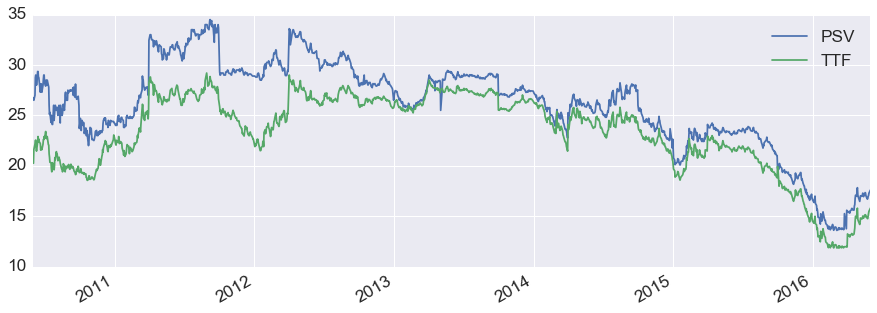

In [8]:
_ = df.plot()

# Cointegration

The ratio between two cointegrated timeseries will vary around a mean and this property is the basis of 'pairs trading strategies'. In other words, cointegrated timeseries might not necessarily follow a similar path to a same 'destination', but they both end up at this destination on expectation.

The figure below shows the ratio between the series but unfortunatley they don't seem so cointergated wrt to the mean... so I will switch to crude and gasoil!

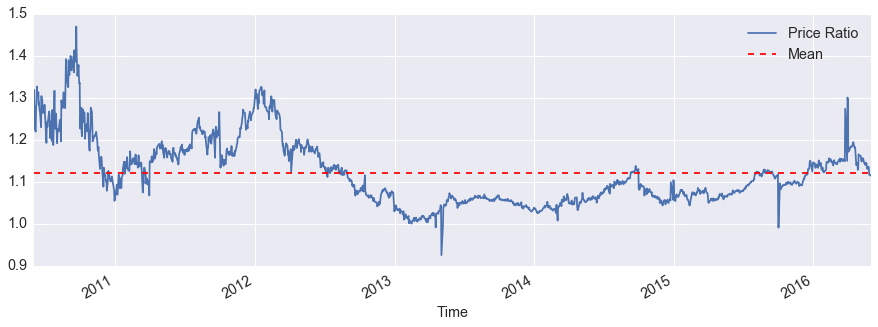

In [15]:
Y = df['PSV']
X = df['TTF']
(Y/X).plot()
plt.axhline((Y/X).mean(), color='red', linestyle='--') # Add the mean
plt.xlabel('Time')
plt.legend(['Price Ratio', 'Mean']);

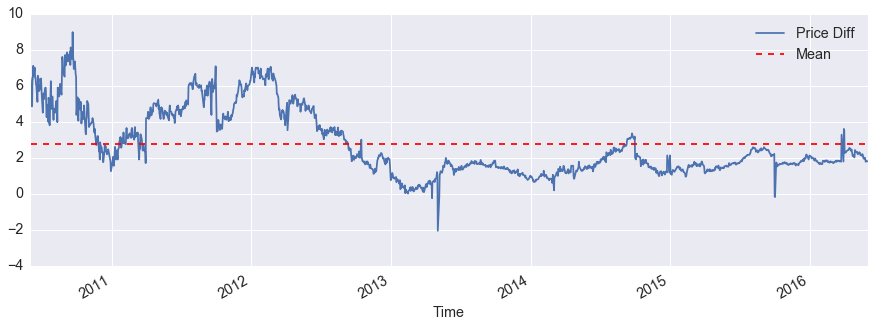

In [17]:
(Y - X).plot()
plt.axhline((Y-X).mean(), color='red', linestyle='--') # Add the mean
plt.xlabel('Time')
plt.legend(['Price Diff', 'Mean']);

# To do

* "from statsmodels.tsa.stattools import coint"

* https://www.quandl.com/data/SCF/documentation/documentation